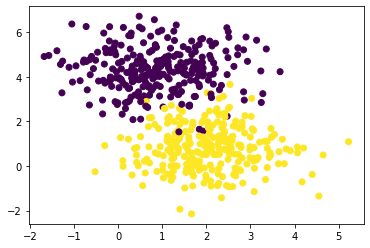

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# On génère nos données syntéhtiques :
X, y = make_blobs(n_samples= 550, centers=2, cluster_std=1.0, random_state= 0)
plt.scatter(X[:,0], X[:,1], c=y)

In [3]:
np.shape(X)

(550, 2)

In [4]:
np.shape(y)

(550,)

In [5]:
malignIdx = np.argwhere(y == 1)

benignIdx = np.argwhere(y == 0)

#print(malignIdx)

#  On dénombre le nombre d'observations bénines et malines.

# la fonction len() renvoie la longueur d'un vecteur

print("Maline :",len(malignIdx))

print("Bénine :",len(benignIdx))

Maline : 275
Bénine : 275


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [7]:
x_train.shape

(440, 2)

In [8]:
x_test.shape

(110, 2)

786.4383894933998

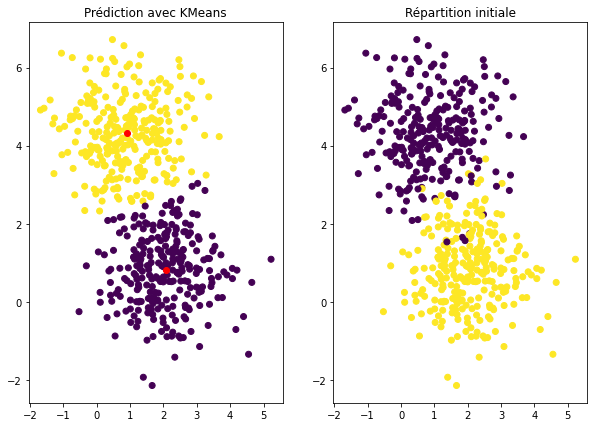

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, init ='k-means++', n_init = 10, max_iter = 300)
model.fit(x_train)
y_pred =  model.predict(X)
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.title("Prédiction avec KMeans")
plt.scatter(X[:,0], X[: , 1], c=y_pred)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r')
plt.subplot(122)
plt.title("Répartition initiale")
plt.scatter(X[:,0], X[:,1], c=y)
model.inertia_ 

In [10]:
malignPredictIdx = np.argwhere(model.predict(X)  == 1)

benignPredictIdx = np.argwhere(model.predict(X)  == 0)


print("Maline :",len(malignPredictIdx))

print("Bénine :",len(benignPredictIdx))

Maline : 276
Bénine : 274


In [11]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [12]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[60  0]
 [ 3 47]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.94      0.97        50

    accuracy                           0.97       110
   macro avg       0.98      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



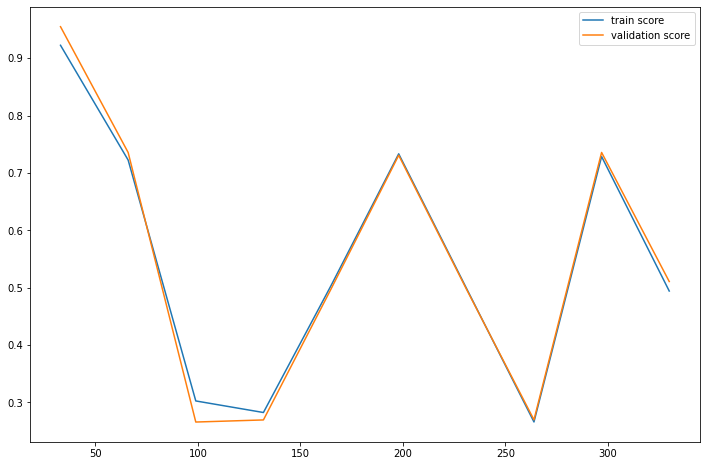

In [13]:
evaluation(model)

In [18]:
 import numpy as np
 from sklearn.model_selection import StratifiedKFold

 skf = StratifiedKFold(n_splits=2)
 skf.get_n_splits(X, y)
 print(skf)
 for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

In [16]:
print(y)

[0 0 1 1]


In [17]:
print(X)

[[1 2]
 [3 4]
 [1 2]
 [3 4]]
